# 零售企业销售数据分析

<font size=4>导入销售数据</font>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
from pandas import read_csv
data1=pd.read_csv('marketbasket.csv', encoding="gbk")
data2=pd.read_csv('marketitem.csv', encoding="gbk")

<font size=4>查看数据前5行</font>

In [14]:
print(data1.head(5))
print(data2.head(5))

  SHOP_DATETIME STORE_CODE  POS_NO  BASK_CODE  BASK_SPEND
0    2018-06-01       D007       3     250458         8.0
1    2018-06-01       D007       3     250200        32.7
2    2018-06-01       D007       1     161068        16.8
3    2018-06-01       D007       8       5325        30.4
4    2018-06-01       D007       8       5361       191.3
        SDATE STORE_CODE  POSID  BASK_CODE  PROD_CODE  ITEM_QUANTITY  \
0  2018-06-01       D007      3     250451      29405          1.000   
1  2018-06-01       D007      3     250451      13187          1.000   
2  2018-06-01       D007      3     250243     196249          1.000   
3  2018-06-01       D007      3     250243     199637          1.000   
4  2018-06-01       D007      1     160905     195012          3.222   

   ITEM_SPEND  NORMAL_PRICE DISCOUNT_TYPE  DISCOUNT_AMOUNT  
0        1.70           2.0             m             -0.3  
1        1.00           1.0             n              0.0  
2       99.00          99.0         

<font size=4>查看数据基本情况</font>

In [15]:
data1.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


In [16]:
data2.describe()

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06
mean,2.994959e+00,1.659824e+05,1.144861e+05,1.436702e+00,1.285536e+01,1.424412e+01,-1.624232e+00
std,2.470286e+00,8.583102e+04,8.161988e+04,7.015504e+00,1.022148e+02,2.403937e+01,5.160490e+01
min,1.000000e+00,9.610000e+02,1.900000e+01,-6.000000e+02,-3.594000e+04,5.000000e-01,-5.760000e+04
25%,1.000000e+00,8.995200e+04,2.183500e+04,1.000000e+00,3.800000e+00,3.800000e+00,-1.000000e+00
50%,2.000000e+00,1.758280e+05,1.233210e+05,1.000000e+00,7.000000e+00,7.800000e+00,0.000000e+00
75%,3.000000e+00,2.229530e+05,1.959930e+05,1.000000e+00,1.200000e+01,1.500000e+01,0.000000e+00
max,2.000000e+01,3.239140e+05,2.250470e+05,4.020000e+03,6.912000e+04,1.980000e+03,9.300000e+02


<font size=4>查看数据类型</font>

In [17]:
data1.dtypes

SHOP_DATETIME     object
STORE_CODE        object
POS_NO             int64
BASK_CODE          int64
BASK_SPEND       float64
dtype: object

In [18]:
data2.dtypes

SDATE               object
STORE_CODE          object
POSID                int64
BASK_CODE            int64
PROD_CODE            int64
ITEM_QUANTITY      float64
ITEM_SPEND         float64
NORMAL_PRICE       float64
DISCOUNT_TYPE       object
DISCOUNT_AMOUNT    float64
dtype: object

<font size=4>检查是否有缺失值</font>

In [19]:
print(data1.isnull().any())
print("*"*30)
print(data2.isnull().any())

SHOP_DATETIME    False
STORE_CODE       False
POS_NO           False
BASK_CODE        False
BASK_SPEND       False
dtype: bool
******************************
SDATE              False
STORE_CODE         False
POSID              False
BASK_CODE          False
PROD_CODE          False
ITEM_QUANTITY      False
ITEM_SPEND         False
NORMAL_PRICE       False
DISCOUNT_TYPE      False
DISCOUNT_AMOUNT    False
dtype: bool


<font size=4>统计各个门店的销售额并可视化呈现</font>

In [24]:
mdsale1 =data1.groupby(by="STORE_CODE")
sell_groupby_STORE_CODE = mdsale1["BASK_SPEND"].sum()
sell_groupby_STORE_CODE

STORE_CODE
A001    3.435303e+06
A004    5.123467e+05
A006    9.383050e+05
A007    6.866382e+05
A008    1.311171e+06
A009    7.977389e+05
A010    6.448924e+05
A012    8.469747e+05
A013    1.117126e+06
A016    7.398143e+05
A017    3.945074e+05
A018    5.584417e+05
A019    6.486686e+05
A021    7.387401e+05
A022    4.874459e+05
D002    3.129447e+06
D003    2.435843e+05
D004    8.078603e+05
D005    5.541030e+05
D006    7.935042e+05
D007    1.361607e+06
D008    6.930078e+05
D009    4.704280e+05
D010    3.636179e+05
Name: BASK_SPEND, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

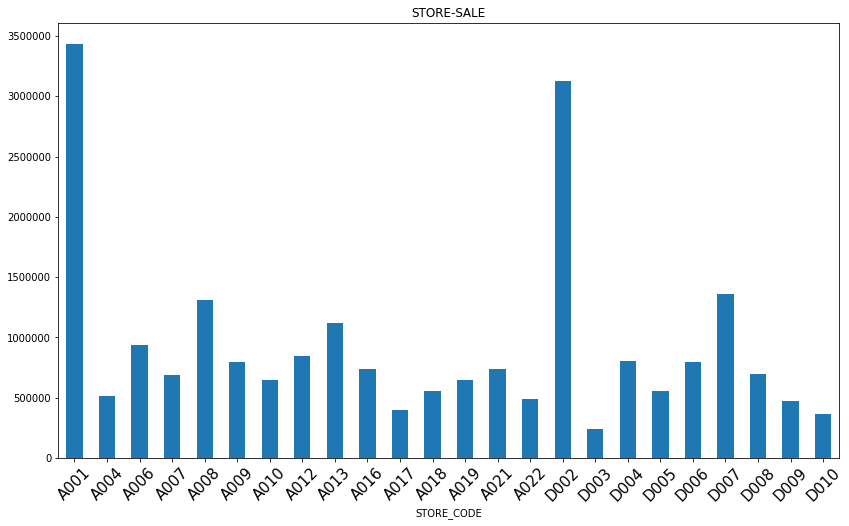

In [26]:
sell_groupby_STORE_CODE.plot(kind='bar',title='STORE-SALE',figsize=(14,8))
plt.xticks(fontsize=15,rotation=45)

<font size=4>统计各个门店的让利情况并可视化呈现</font>

In [27]:
rlqk =data2.groupby(by="STORE_CODE")
rl_groupby_STORE_CODE = rlqk["DISCOUNT_AMOUNT"].sum()
rl_groupby_STORE_CODE

STORE_CODE
A001   -454457.05
A004    -58657.79
A006   -115700.27
A007    -78634.92
A008   -138164.49
A009    -81139.40
A010    -73648.42
A012   -116310.50
A013   -135125.86
A016    -78571.15
A017    -47831.54
A018    -68675.89
A019    -80341.30
A021    -77323.69
A022    -45195.82
D002   -465244.61
D003    -23871.27
D004   -109239.76
D005    -77246.94
D006    -84627.86
D007   -215108.26
D008    -90824.42
D009    -49390.58
D010    -49074.50
Name: DISCOUNT_AMOUNT, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

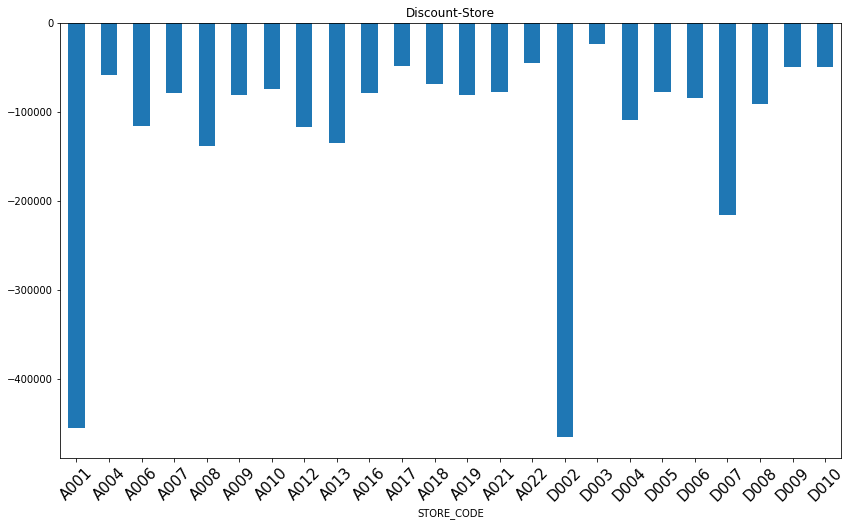

In [28]:
rl_groupby_STORE_CODE.plot(kind='bar',title='Discount-Store',figsize=(14,8))
plt.xticks(fontsize=15,rotation=45)